# 1.	Firstly, replace all Missing values with relevant figures

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df =pd.read_csv("Dataset_Day10.csv")

display(df.head())
display(df.info())

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


None

In [2]:
#Displaying missing values
Missing_value= (df[["Glucose","BloodPressure","BMI","DiabetesPedigreeFunction"]] == 0).sum()
print("% of Missing values in")
print(Missing_value/len(df)*100)

% of Missing values in
Glucose                     0.651042
BloodPressure               4.557292
BMI                         1.432292
DiabetesPedigreeFunction    0.000000
dtype: float64


In [3]:
# Replace missing values with median
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df_Nomv=df
dfx=df

# Then remove all existing outliers and get the final data for classification.

In [4]:
def remove_outliers(df,columns):
    Q1= df[columns].quantile(0.25)
    Q3= df[columns].quantile(0.75)
    IQR= Q3 - Q1
    df_clean = df[~((df[columns] < (Q1 - 1.5 * IQR)) |(df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_clean

columns_to_check = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']
data_clean = remove_outliers(df, columns_to_check)

print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", data_clean.shape)

Original dataset shape: (768, 7)
Cleaned dataset shape: (682, 7)


# 3.	Split the data into 80% training and 20% testing data. Then, use a Decision Tree classifier algorithm with target variable as ‘Outcome’.

a.	Print the default model performance metrics: Accuracy, Precision, Recall, F1Score

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix
import math

X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=50)

dt = DecisionTreeClassifier(random_state=50)

# fit the model
dt = dt.fit(X_train,y_train)

# predict using fitted model
y_pred = dt.predict(X_test)

print("Model Performance metrics are as below :-\n")
print("Accuracy is "+str(accuracy_score(y_test,y_pred)))
print("Precision is "+str(precision_score(y_test,y_pred)))
print("Recall is "+str(recall_score(y_test,y_pred)))
print("F1-Score is "+str(f1_score(y_test,y_pred)))


Model Performance metrics are as below :-

Accuracy is 0.7532467532467533
Precision is 0.6595744680851063
Recall is 0.5849056603773585
F1-Score is 0.62


# OBSERVATIONS:

Accuracy: The model has an accuracy of approximately 0.753. This indicates that the model correctly classifies around 75% of the instances.

Precision: The precision is around 0.659. This means that when the model predicts a positive class, it is correct about 66% of the time.

Recall: The recall is 0.584. This is relatively low, indicating that the model only captures around 58% of the actual positive instances.

F1-Score: The F1-Score is 0.62. This combines precision and recall into a single metric and is also relatively low.


[Text(0.42539983164983164, 0.96875, 'Glucose <= 127.5\ngini = 0.455\nsamples = 614\nvalue = [399, 215]\nclass = 0'),
 Text(0.1933922558922559, 0.90625, 'Age <= 30.5\ngini = 0.294\nsamples = 379\nvalue = [311, 68]\nclass = 0'),
 Text(0.13313692480359146, 0.84375, 'Pregnancies <= 6.5\ngini = 0.157\nsamples = 233\nvalue = [213, 20]\nclass = 0'),
 Text(0.10129068462401795, 0.78125, 'BMI <= 45.4\ngini = 0.137\nsamples = 229\nvalue = [212, 17]\nclass = 0'),
 Text(0.06453423120089787, 0.71875, 'BMI <= 30.95\ngini = 0.117\nsamples = 225\nvalue = [211, 14]\nclass = 0'),
 Text(0.017957351290684626, 0.65625, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.015\nsamples = 130\nvalue = [129, 1]\nclass = 0'),
 Text(0.008978675645342313, 0.59375, 'gini = 0.0\nsamples = 116\nvalue = [116, 0]\nclass = 0'),
 Text(0.026936026936026935, 0.59375, 'DiabetesPedigreeFunction <= 0.697\ngini = 0.133\nsamples = 14\nvalue = [13, 1]\nclass = 0'),
 Text(0.017957351290684626, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [

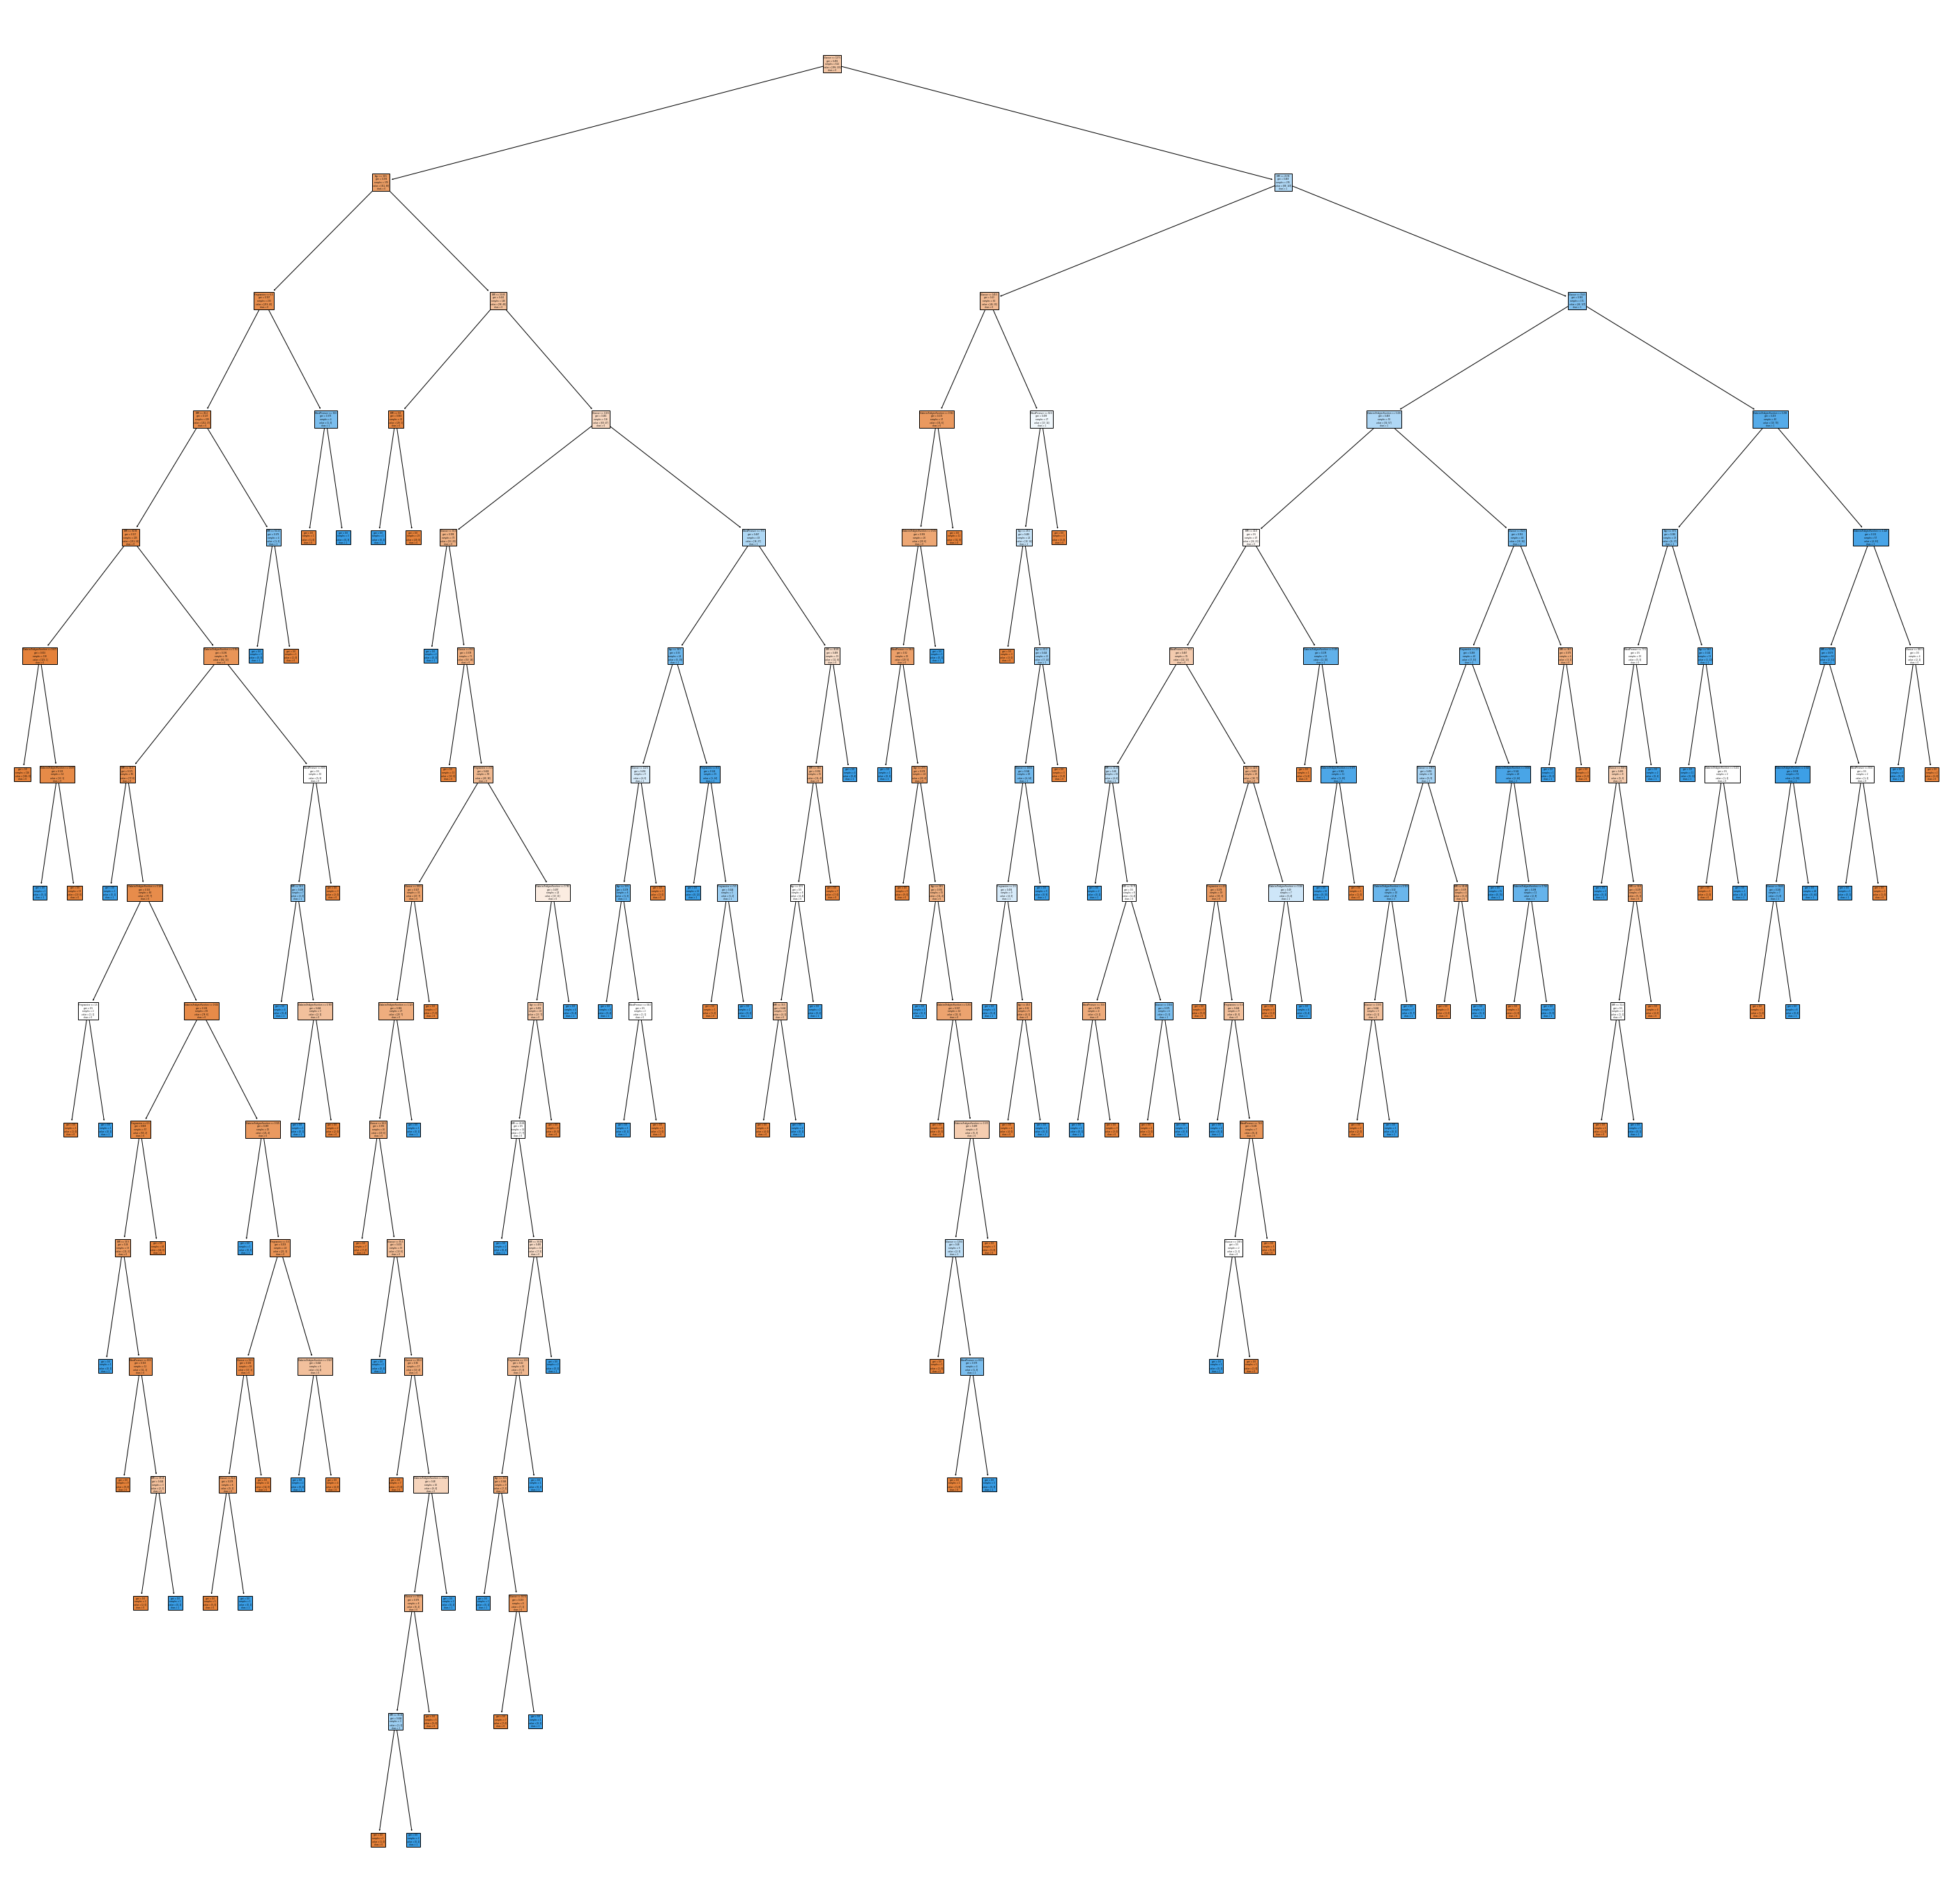

In [24]:
plt.figure(figsize = (50,50))
tree.plot_tree(dt, feature_names = list(X.columns),
 class_names = ['0','1'],
 filled = True)

In [25]:
text = tree.export_text(dt)
print(text)

|--- feature_1 <= 127.50
|   |--- feature_5 <= 30.50
|   |   |--- feature_0 <= 6.50
|   |   |   |--- feature_3 <= 45.40
|   |   |   |   |--- feature_3 <= 30.95
|   |   |   |   |   |--- feature_4 <= 0.67
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  0.67
|   |   |   |   |   |   |--- feature_4 <= 0.70
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  0.70
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  30.95
|   |   |   |   |   |--- feature_4 <= 0.74
|   |   |   |   |   |   |--- feature_3 <= 31.30
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_3 >  31.30
|   |   |   |   |   |   |   |--- feature_4 <= 0.13
|   |   |   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_4 >  0.13
|   |

# b.	Plot a Precision & Recall vs max_leaf_nodes & max_depth (consider a range of numbers for both parameters) curve (both Prec and Rec on the same graph). Find the parameter values for which F1-score is the highest. (Use ‘entropy’ as criterion)

Best parameters based on F1-Score:
 Max Depth         5.000000
Max Leaf Nodes    7.000000
Precision         0.595745
Recall            0.528302
F1-Score          0.560000
Name: 26, dtype: float64


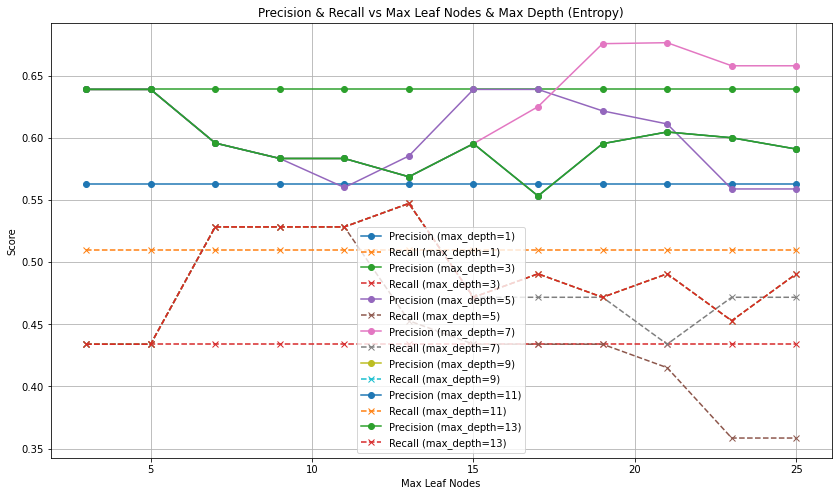

In [27]:
# Define parameter ranges
max_depth = np.arange(1, 15, 2)
max_leaf_nodes = np.arange(3, 26, 2)

# Initialize lists to store performance metrics
precision_list = []
recall_list = []
f1_list = []
param_list = []

# Loop over max_depth and max_leaf_nodes to train and evaluate the model
for d in max_depth:
 for l in max_leaf_nodes:
     dt = DecisionTreeClassifier(criterion='entropy', max_depth=d, max_leaf_nodes=l, random_state=50)
     dt.fit(X_train, y_train)
     y_pred = dt.predict(X_test)
     precision = precision_score(y_test, y_pred)
     recall = recall_score(y_test, y_pred)
     f1 = f1_score(y_test, y_pred)
     precision_list.append(precision)
     recall_list.append(recall)
     f1_list.append(f1)
     param_list.append((d, l))

# Convert results to DataFrame
results = pd.DataFrame({
 'Max Depth': [p[0] for p in param_list],
 'Max Leaf Nodes': [p[1] for p in param_list],
 'Precision': precision_list,
 'Recall': recall_list,
 'F1-Score': f1_list
})

# Find the parameters with the highest F1-Score
best_params = results.loc[results['F1-Score'].idxmax()]
print("Best parameters based on F1-Score:\n", best_params)

# Plot Precision and Recall vs max_leaf_nodes & max_depth
fig, ax = plt.subplots(figsize=(14, 8))
for d in max_depth:
 sub_df = results[results['Max Depth'] == d]
 ax.plot(sub_df['Max Leaf Nodes'], sub_df['Precision'], marker='o', label=f'Precision (max_depth={d})')
 ax.plot(sub_df['Max Leaf Nodes'], sub_df['Recall'], marker='x', linestyle='--', label=f'Recall (max_depth={d})')

ax.set_xlabel('Max Leaf Nodes')
ax.set_ylabel('Score')
ax.set_title('Precision & Recall vs Max Leaf Nodes & Max Depth (Entropy)')
ax.legend()
plt.grid(True)
plt.show()


# OBSERVATIONS

Best Parameters:
->Max Depth: 5

-> Max Leaf Nodes: 7

-> Precision: 0.595745

-> Recall: 0.528302

-> F1-Score: 0.560000

# Precision Trends:

Max Depth 1: Precision starts nearly  at 0.65 with 1 leaf node and quickly drops to a constant low value as the number of leaf nodes increases.

-> Max Depth 3, 5, 7, 9, 11, 13: Precision generally starts lower, has some fluctuations, and then stabilizes as the number of leaf nodes increases, with minor variations.

# Recall Trends:

-> Max Depth 1: Recall starts very low and remains low regardless of the number of leaf nodes.

-> Max Depth 3: Recall starts high, slightly decreases, and then stabilizes.

-> Max Depth 5, 7, 9, 11, 13: Recall starts high and gradually decreases with increasing number of leaf nodes.


# F1 Score:

The F1-score (which balances precision and recall) is best for max depth 5 and max leaf nodes 7. This is a balanced point where both precision and recall are reasonably high.